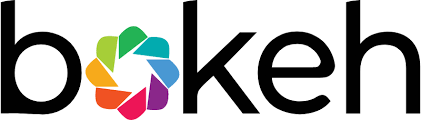

# [Micro task 1] Exploring NYC taxi trips dataset using Bokeh

by Isaak Kamau     
3/12/2023



__`Bokeh`__ is a Python library that allows you to create interactive visualizations and data applications in web browsers. By using `Bokeh plot`, you can create various types of plots such as `scatter plots`, `bar charts`, and `line charts` that provide a clear and concise view of the data. These plots can help you identify `patterns`, `trends`, and `outliers` in the data that might not be easily detectable through raw numbers or statistical analysis. Moreover, with `Bokeh`, you can create interactive plots that allow users to hover over data points, zoom in/out, and pan around the plots, providing a more immersive and exploratory experience.

Exploring the `NYC taxi trips dataset` using `Bokeh plot` is an effective way to visually analyze and understand the data.Let's dive in to explore and communicate insights from the `NYC taxi trips dataset` using __`Bokeh`__

In [1]:
'''
To work with a Parquet file, we'll need to use a different library than Pandas to read the data.
I recommend using the 'pyarrow' library, which is designed to work with Parquet files and integrates well with Bokeh. 

'''

import pyarrow.parquet as pq

In [2]:
# We import all the necessary libraries
import bokeh
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, ColorBar
from bokeh.layouts import row, column
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap


In [3]:
# Load the Parquet file
taxi_data = pq.read_table('yellow_tripdata_2022-02.parquet').to_pandas()

In [4]:
# We get the first 10 entries from the dataset
taxi_data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25
5,1,2022-02-01 00:57:23,2022-02-01 01:07:31,2.0,2.30,1.0,N,140,142,1,10.0,3.00,0.5,2.75,0.00,0.3,16.55,2.5,0.00
6,1,2022-02-01 00:34:17,2022-02-01 01:01:32,1.0,7.50,1.0,N,140,36,1,25.0,3.00,0.5,5.00,0.00,0.3,33.80,2.5,0.00
7,2,2022-02-01 00:03:26,2022-02-01 00:07:30,1.0,0.88,1.0,N,48,68,1,5.0,0.50,0.5,1.76,0.00,0.3,10.56,2.5,0.00
8,2,2022-02-01 00:13:31,2022-02-01 00:31:41,1.0,6.48,1.0,N,142,244,1,21.0,0.50,0.5,4.96,0.00,0.3,29.76,2.5,0.00
9,2,2022-02-01 00:52:11,2022-02-01 01:02:48,1.0,3.29,1.0,N,238,116,1,12.0,0.50,0.5,2.66,0.00,0.3,15.96,0.0,0.00


In [5]:
# Convert the pickup datetime column to datetime format
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

In [6]:
# Extract the hour of the day
taxi_data['hour'] = taxi_data['tpep_pickup_datetime'].dt.hour

In [7]:
# Aggregate the data by hour of the day
taxi_data_by_hour = taxi_data.groupby('hour')['total_amount'].count().reset_index()

In [8]:
# Create a ColumnDataSource object
source = ColumnDataSource(taxi_data_by_hour)

In [9]:
# Define the hover tool
hover = HoverTool(tooltips=[("Total trips", "@total_amount")])

In [10]:
# Create the figure
p = figure(x_range=(0, 23), title="Total number of trips by hour of the day", tools=[hover])

In [11]:
# Add the bar chart
p.vbar(x='hour', top='total_amount', source=source, width=0.9)

# Show the plot
show(p)

# Expected Output:

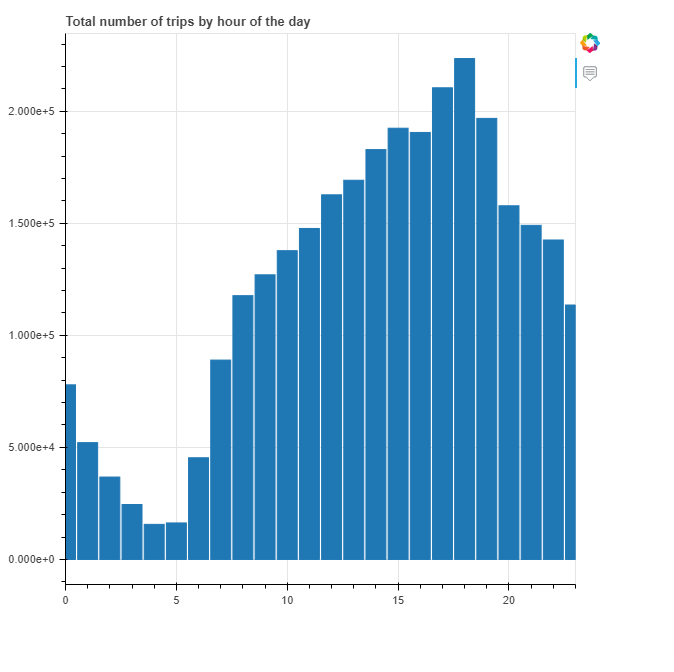

The above plot shows the total number of trips for each hour of the day. The hover tool displays the total number of trips for each hour.

In [12]:
data = taxi_data.groupby(taxi_data['payment_type'].astype(str))['payment_type'].count().to_dict()

source = ColumnDataSource(data=dict(x=list(data.keys()), y=list(data.values())))

p = figure(title="Total Trips by Payment Type", x_range=list(data.keys()), x_axis_label='Payment Type', y_axis_label='Total Trips')
p.vbar(x='x', top='y', width=0.5, source=source)

output_file("bar_chart.html")
show(p)


## Output

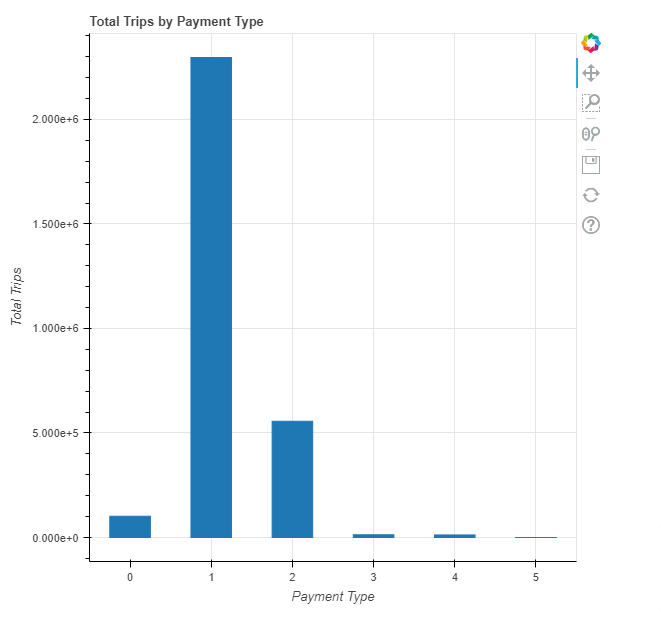

The above plot shows the total number of trips by payment type. The x-axis represents the payment type, while the y-axis represents the total number of trips. You can hover over each bar to see the exact number of trips.

In [14]:

# Select the first 1000 rows of the "PULocationID" and "trip_distance" columns from the taxi_data
# Then convert these values to numpy arrays using the .values method
x = taxi_data["PULocationID"].head(1000).values
y = taxi_data["trip_distance"].head(1000).values

# Create a ColumnDataSource object from the x and y arrays
source = ColumnDataSource(dict(x=x, y=y))

# Create a figure with the specified width, height, and axis labels
p = figure(width=800, height=800, x_axis_label="Passenger's Location ID", y_axis_label="Trip Distance Measure", 
           title="Linear color map plot")

# Use a linear color map to map the "y" column data to a color palette ("Viridis8") and assign it to the "cmap" variable
cmap = linear_cmap(field_name='y', palette="Viridis8", low=min(y), high=max(y))

# Create a scatter plot with x and y columns from the data source, color mapped using "cmap", and with size of 15
p.scatter(x='x', y='y', color=cmap, size=15, source=source)

# Add a color bar to the plot using the "cmap" transform
color_bar = ColorBar(color_mapper=cmap['transform'], width=10)
p.add_layout(color_bar, 'right')

# Display the plot
show(p)


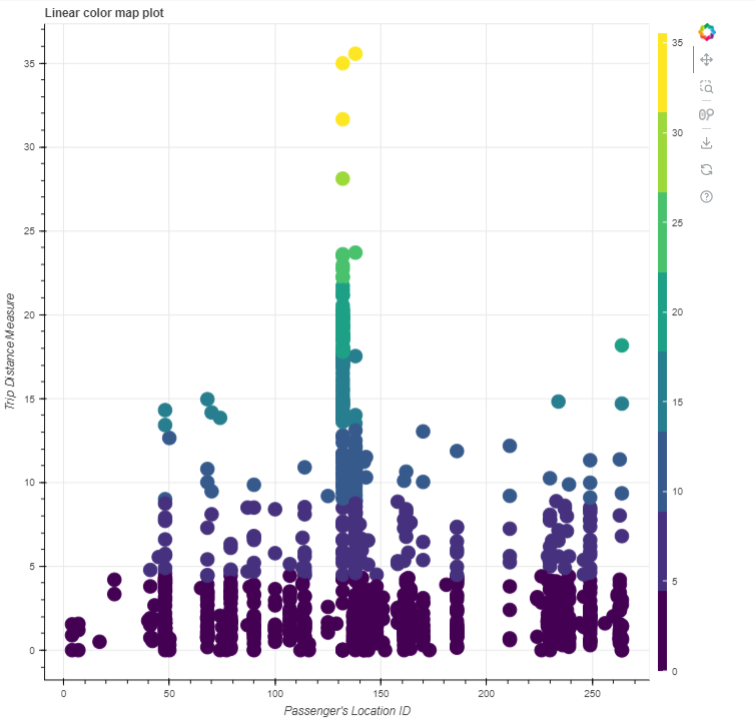

The above plot shows a scatter plot of the trip distance against the passenger location ID for the first 1000 rows of data from the NYC Yellow Taxi dataset. The plot uses a linear color map to represent the trip distance using a color scale ranging from blue to yellow. The color of each data point indicates the trip distance, with lighter colors indicating longer trips. A color bar is included on the right side of the plot to show the mapping between color and trip distance.